# 1、填色图、地图

## 1.1 基本填色图

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

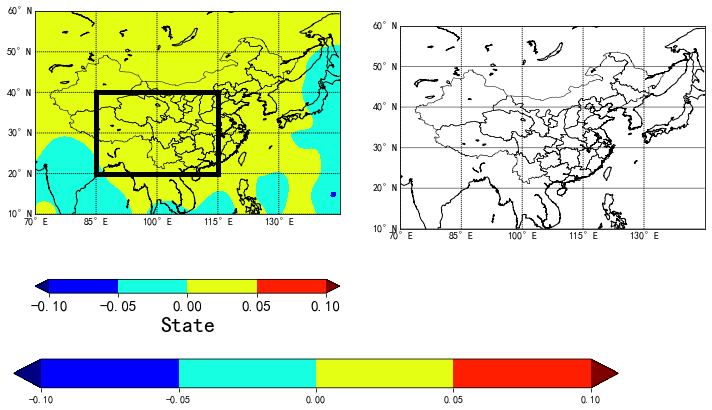

In [28]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.path import Path
import matplotlib.patches as patches


def draw_map(ax):
    m = Basemap(projection='cyl',llcrnrlon=slon,llcrnrlat=slat,urcrnrlon=elon,urcrnrlat=elat,resolution='l',ax=ax)
    m.drawparallels(np.arange(slat,elat,10),labels=[1,0,0,0],fontsize=10)
    m.drawmeridians(np.arange(slon,elon,15), labels=[0,0,0,1],fontsize=10)
    m.drawcoastlines()
    m.readshapefile(shpfile_p,'states',drawbounds=True)
    
    return m
    
slat, elat = 10.0, 60.1
slon, elon = 70.0, 145.0
chn_shapefile = '/home/wanghao/Python/Cmodule/basemap/cnmap/cnhimap.shp'
shpfile_p = '/home/wanghao/Python/Cmodule/basemap/CHN_adm_shp/CHN_adm1'
shpfile_c = '/home/wanghao/Python/Cmodule/basemap/CHN_adm_shp/CHN_adm2'

infile =  '/home/wanghao/Python/DataProcess/read_data/allsky/data/2021071915/dxa.2021071915.nc'
grd = meb.xarray_to_griddata(meb.read_griddata_from_nc(infile,value_name='t').sel(level=27))

lon, lat = grd.lon, grd.lat
lons, lats = np.meshgrid(lon, lat)
cmap = 'jet' # 'CoolWarm', 'jet'
clevs = np.linspace(-0.1, 0.1, 5)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,8))
[ax1,ax2] = axes
ax_cb_h = fig.add_axes([0.1,0.05,0.7,0.05])

m = draw_map(ax1)

CF = m.contourf(lons, lats, grd.values[0,0,0,0,...], levels=clevs, cmap=cmap, extend='both')
CB = fig.colorbar(CF, ax=ax1, orientation='horizontal')
CB.minorticks_off()
CB.ax.tick_params(labelsize=15)
CB.set_label('State', fontsize=22)

m = draw_map(ax2)

# CF = m.contourf(lons, lats, grd.values[0,0,0,0,...], levels=clevs, cmap=cmap, extend='both')

# 创建方框图像
verts = [
    (85, 20), # 矩形左下角的坐标(left,bottom)
    (85, 40), # 矩形左上角的坐标(left,top)
    (115, 40.), # 矩形右上角的坐标(right,top)
    (115, 20.), # 矩形右下角的坐标(right, bottom)
    (0., 0.)] # 封闭到起点

codes = [Path.MOVETO, Path.LINETO, Path.LINETO, Path.LINETO, Path.CLOSEPOLY]
path = Path(verts, codes) #创建一个路径path对象

patch = patches.PathPatch(path, facecolor='none', edgecolor='black', lw=5)
ax1.add_patch(patch)

# fig colorbar
CB = fig.colorbar(CF, cax=ax_cb_h, orientation='horizontal')
CB.minorticks_off()

# 2、基本图形

## 2.1折线图，柱状图

<IPython.core.display.Javascript object>

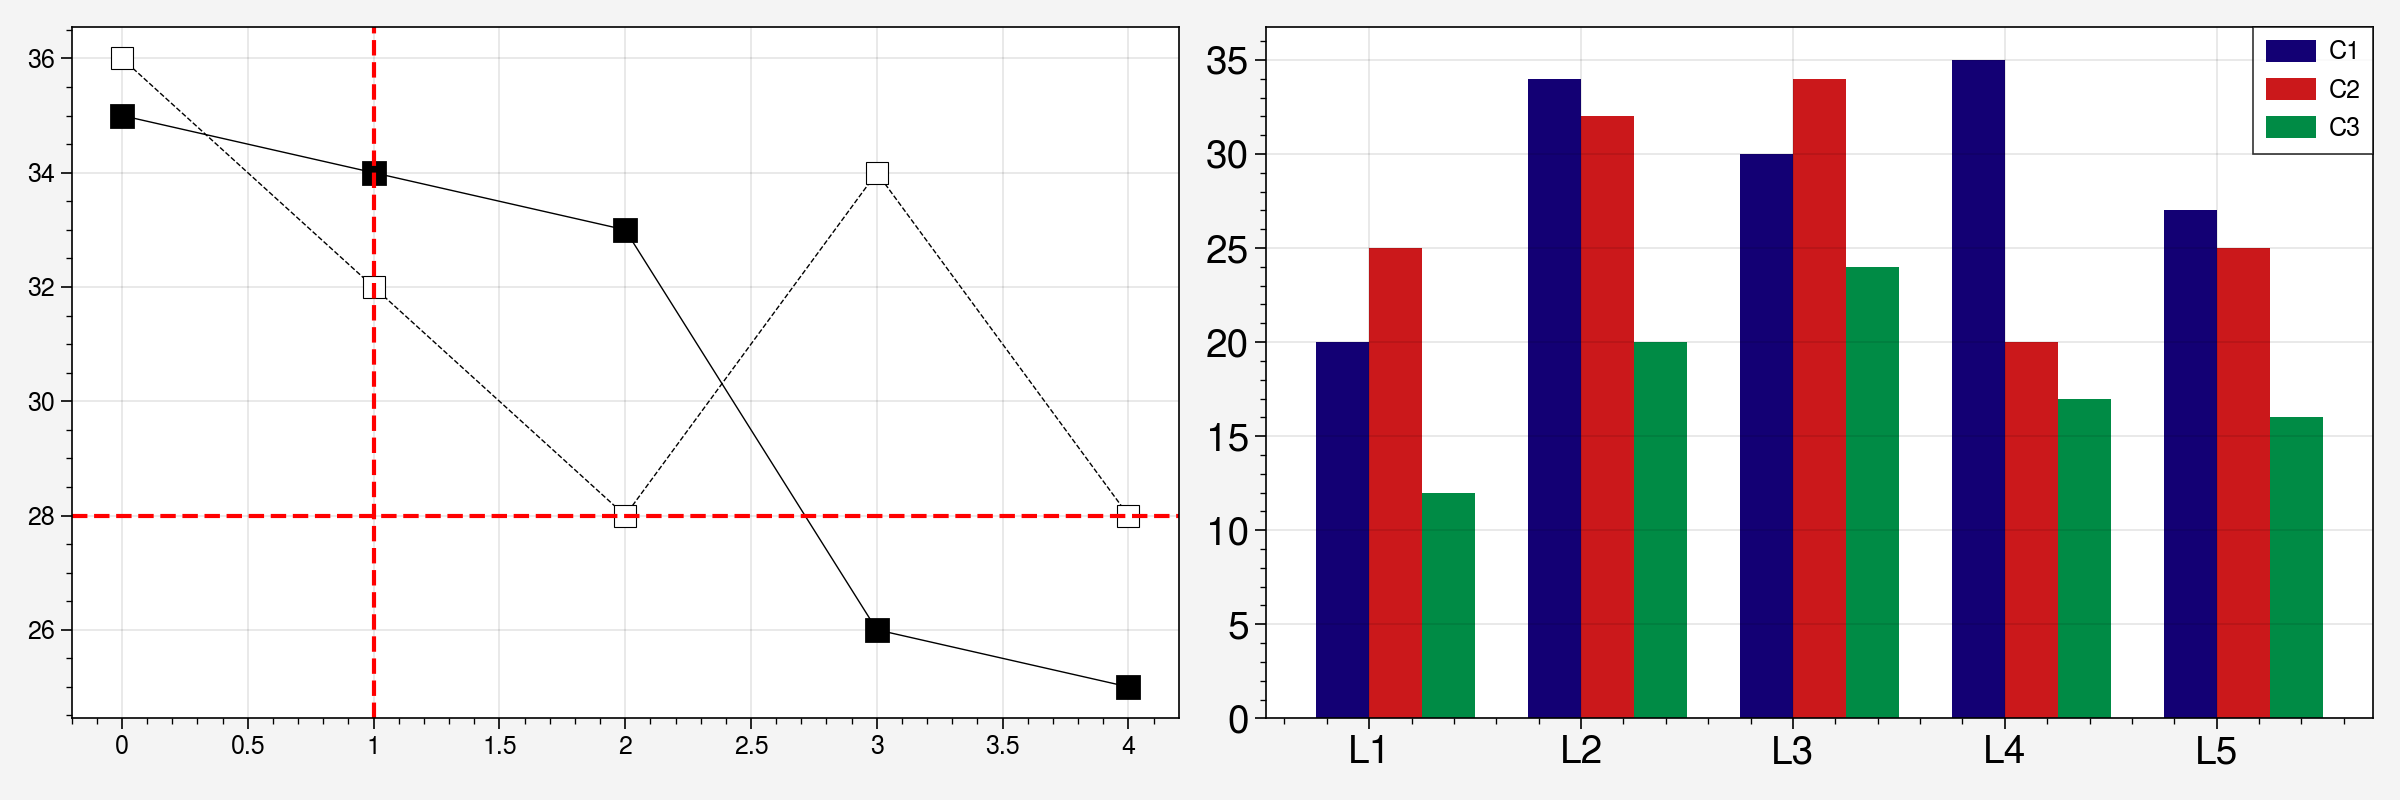

In [112]:
import matplotlib.pyplot as plt

labels = ['L1','L2','L3','L4','L5']

y1 = [35, 34, 33, 26, 25]
y2 = [36, 32, 28, 34, 28]

data_a = [20,34,30,35,27]
data_b = [25,32,34,20,25]
data_c = [12,20,24,17,16]

x = np.arange(len(labels))
width = 0.25

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(12,4))

# line
axs[0].plot(x, y1, marker='s', c='k', lw=0.5, label='D1', markersize=8)
axs[0].plot(x, y2, marker='s', c='k', ls='--', lw=0.5, label='D1', markersize=8, markerfacecolor='white', markeredgewidth=0.4)
axs[0].axhline(y=28.,color='red',ls='--')
axs[0].axvline(x=1.,color='red',ls='--')


# bar
axs[1].bar(x-width/2, data_a, width, color='#130074', lw=0.5,   label='C1')
axs[1].bar(x+width/2, data_b, width, color='#CB181B', lw=0.5,   label='C2')
axs[1].bar(x+width*3/2, data_c, width, color='#008B45', lw=0.5, label='C3')
axs[1].legend()
axs[1].set_xticks(x)
axs[1].set_xticklabels(labels)
axs[1].tick_params(axis="both", labelsize=14)

plt.tight_layout()

<IPython.core.display.Javascript object>

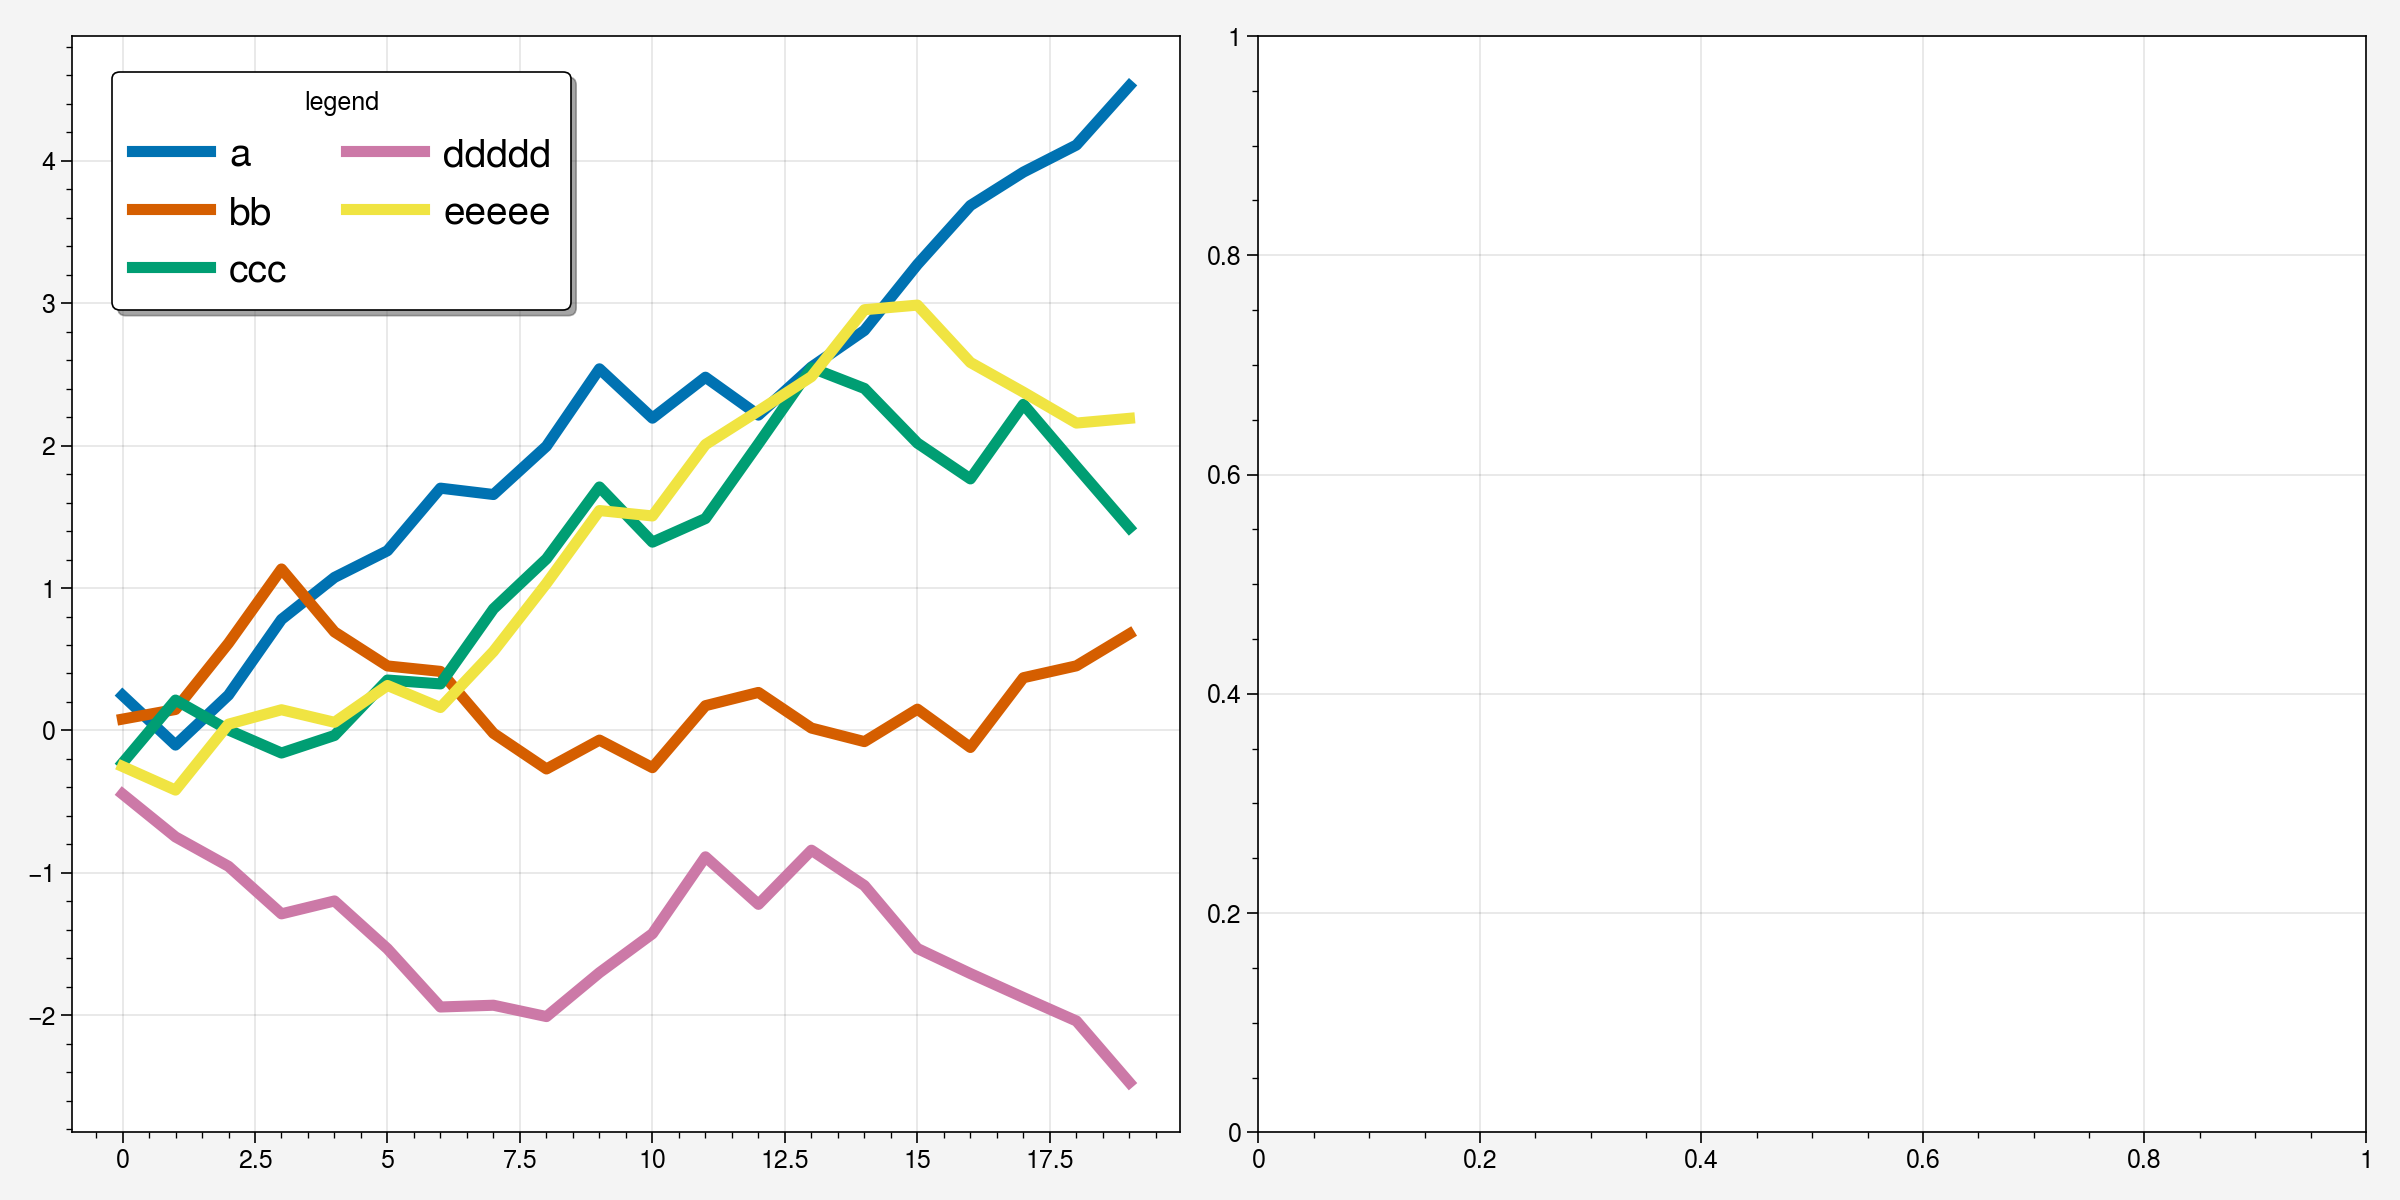

In [111]:
labels = ['a', 'bb', 'ccc', 'ddddd', 'eeeee']

fig, axs = plt.subplots(ncols=2, figsize=(12,6))

state = np.random.RandomState(51423)
for i,label in enumerate(labels):
    data = (state.rand(20) - 0.45).cumsum(axis=0)
    axs[0].plot(data, lw=4, label=label)
    axs[0].legend(fontsize=14, ncol=2, title='legend', bbox_to_anchor=[0.45, 0.75], shadow=True, fancybox=True)
    
    plt.tight_layout()

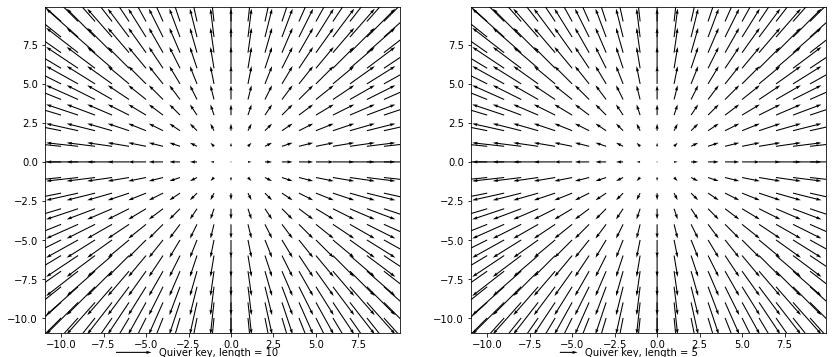

In [1]:
import matplotlib.pyplot as plt
import numpy as np

X = np.arange(-10, 10, 1)
Y = np.arange(-10, 10, 1)
U, V = np.meshgrid(X, Y)

fig, axes = plt.subplots(ncols=2, figsize=(14,6))
q = axes[0].quiver(X, Y, U, V, scale=100,  units='width')
axes[0].quiverkey(q, X=0.3, Y=-0.06, U=10,
             label='Quiver key, length = 10', labelpos='E')

q = axes[1].quiver(X, Y, U, V, scale=100,  units='width')
axes[1].quiverkey(q, X=0.3, Y=-0.06, U=5,
             label='Quiver key, length = 5', labelpos='E')

plt.show()